***
# Exploratory Data Analysis

I decided to dive deep into the data before building models. My EDA has information about:



### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("data-scientist-salary-cleaned.csv")

### Simplify job title

I found the job title is not very informative. Thus, I decided to parse it into job title and seniority, which I think are highly relevant to data scientists salary.

In [4]:
# Two functions for parsing the job title: title_simplifier and seniority

def title_simplifier(title):
    if "data scientist" in title.lower() or "scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "data analyst"
    elif "machine learning" in title.lower():
        return "machine learning engineer"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"

def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower() or "sr." in title.lower():
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower() or "junior" in title.lower() or "associate" in title.lower():
        return "junior"
    else:
        return "na"

In [5]:
# create simplified job title column
df["job_simplified"] = df["Job Title"].apply(title_simplifier)

In [8]:
# 667 out of 1000 jobs are data scientist related and 136 out of 1000 are data analyst related.
df["job_simplified"].value_counts(ascending= False)

data scientist               667
data analyst                 136
data engineer                 71
na                            67
machine learning engineer     46
manager                       11
director                       2
Name: job_simplified, dtype: int64

In [9]:
# create seniority column
df["seniority"] = df["Job Title"].apply(seniority)

In [11]:
# 814 out of 1000 jobs did not specify seniority
df["seniority"].value_counts(ascending= False)

na        814
senior    176
junior     10
Name: seniority, dtype: int64

### Job description length

The length of job description may be an interesting thing to look at. I personally assume that the longer the description the higher the salary. I would like to see the correlation between these two so I make the "description length" column.

In [12]:
df["description_length"] = df["Job Description"].apply(lambda x: len(x))

### Analysis 

I made some graphs and tables to see if I can find anything interesting!

In [10]:
df.describe()

,Rating,Founded,Competitors,min_salary,max_salary,avg_salary,age,python_y/n,r_y/n,spark_y/n,aws_y/n,excel_y/n,sas_y/n,matlab_y/n,tableau_y/n,tensorflow_y/n,description_length
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,3.655000,1698.493000,-1.0,86.142000,135.506000,110.824000,32.361000,0.666000,0.010000,0.188000,0.233000,0.503000,0.167000,0.075000,0.201000,0.13900,3717.098000
std,1.134541,695.722682,0.0,24.416265,32.365313,27.533818,42.336853,0.471876,0.099549,0.390908,0.422954,0.500241,0.373162,0.263523,0.400949,0.34612,1652.112303
min,-1.000000,-1.000000,-1.0,38.000000,74.000000,56.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,22.000000
25%,3.400000,1939.000000,-1.0,65.000000,112.000000,88.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2645.000000
50%,3.900000,1994.000000,-1.0,86.000000,128.000000,107.500000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,3543.000000
75%,4.200000,2009.000000,-1.0,105.000000,160.000000,130.500000,44.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,4510.000000
max,5.000000,2020.000000,-1.0,135.000000,215.000000,175.000000,236.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,18659.000000


In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state', 'age',
       'python_y/n', 'r_y/n', 'spark_y/n', 'aws_y/n', 'excel_y/n', 'sas_y/n',
       'matlab_y/n', 'tableau_y/n', 'tensorflow_y/n', 'job_simplified',
       'seniority', 'description_length'],
      dtype='object')

### Distribution

I made some histograms to visulize the distribution of some solumns.

<AxesSubplot:>

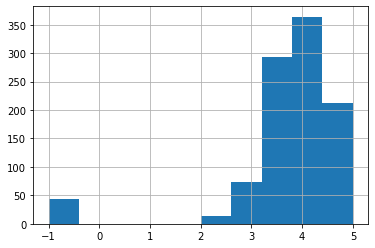

In [17]:
# it approximates normal
df.Rating.hist()

<AxesSubplot:>

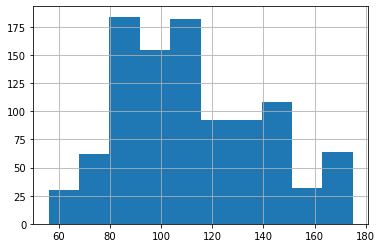

In [14]:
# it approximates normal
df.avg_salary.hist()

<AxesSubplot:>

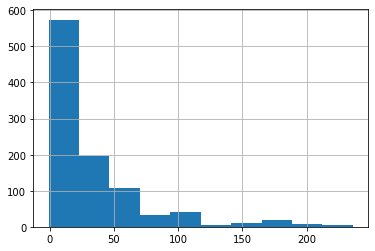

In [15]:
# it is skewed. As we can see, younger companies are hiring aggressively.
df.age.hist()

<AxesSubplot:>

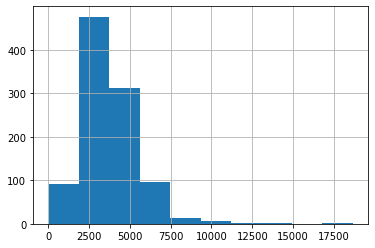

In [16]:
# it approximates normal
df.description_length.hist()

### Correlation between age/rating/description_length and average salary

Would there be any correlation between salary and age of the company/rating/description length?
I made a correlation graph to visualize the relationships.

In [18]:
corr = df[["avg_salary", "age", "Rating", "description_length"]].corr()

<AxesSubplot:>

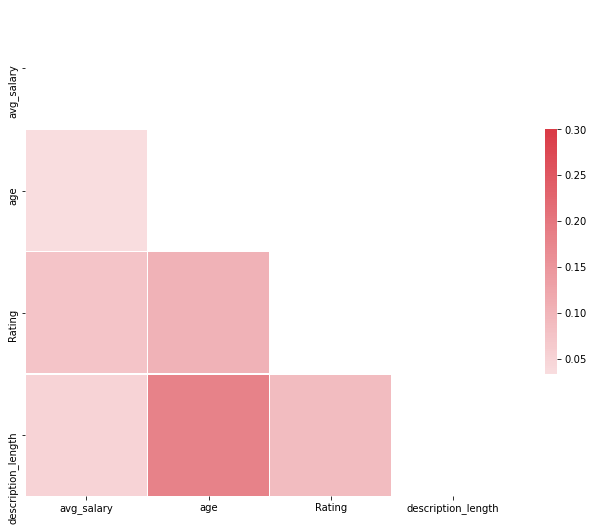

In [19]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Surprisingly, the correlations are weak. Among age, rating, and description_length, age of the company seems to be correlated with salary. So, we may assume that established companies usually offer higher salaries for data scientists.

### Histograms about some categorical data

Let's see some interesting graphs that can answer following questions:

- Which states have a high demand for data scientists?

- Company of which size/industry/type of ownership hire more data scientists?

- How many jobs require/prefer applicants to have python/r/spark/aws/excel/sas/matlab/tableau/tensorflow skills? 

- What are the demands for data scientists, data analysts and others?

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state', 'age',
       'python_y/n', 'r_y/n', 'spark_y/n', 'aws_y/n', 'excel_y/n', 'sas_y/n',
       'matlab_y/n', 'tableau_y/n', 'tensorflow_y/n', 'job_simplified',
       'seniority', 'description_length'],
      dtype='object')

In [20]:
df_cat = df[['job_state', 'Size', 'python_y/n', 'r_y/n', 'spark_y/n', 'aws_y/n', 'excel_y/n', 'sas_y/n', 'matlab_y/n', 'tableau_y/n', 'tensorflow_y/n', 'job_simplified', 'seniority', 'Type of ownership', 'Sector', 'Revenue']]

graph for job_state: total = 38


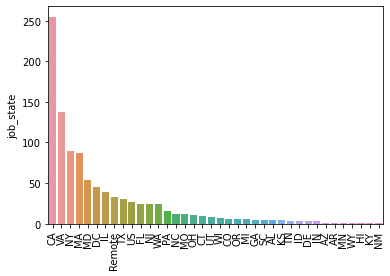

graph for Size: total = 9


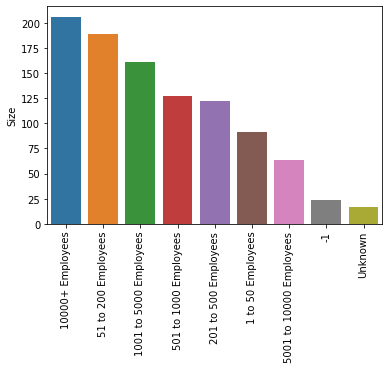

graph for python_y/n: total = 2


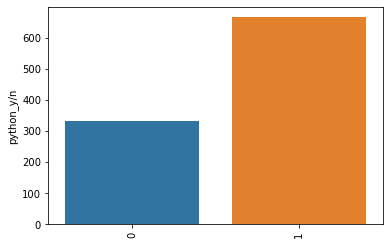

graph for r_y/n: total = 2


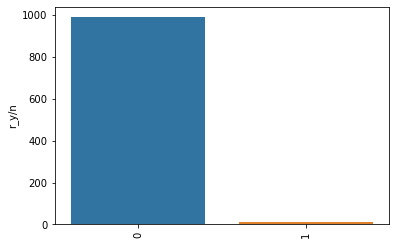

graph for spark_y/n: total = 2


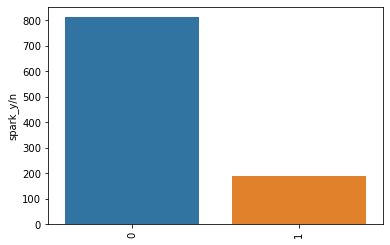

graph for aws_y/n: total = 2


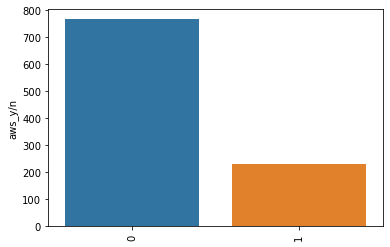

graph for excel_y/n: total = 2


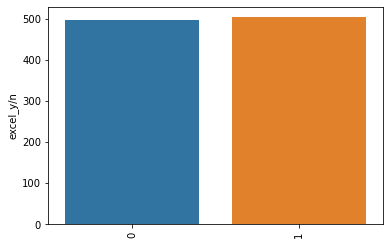

graph for sas_y/n: total = 2


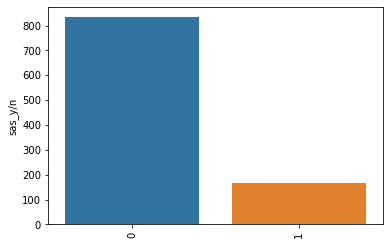

graph for matlab_y/n: total = 2


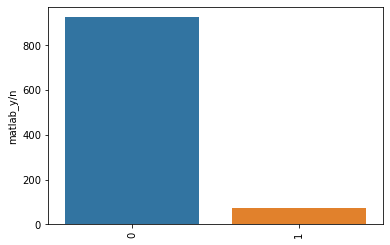

graph for tableau_y/n: total = 2


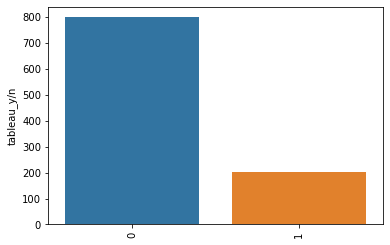

graph for tensorflow_y/n: total = 2


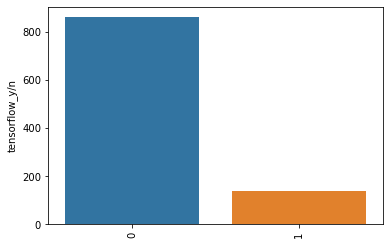

graph for job_simplified: total = 7


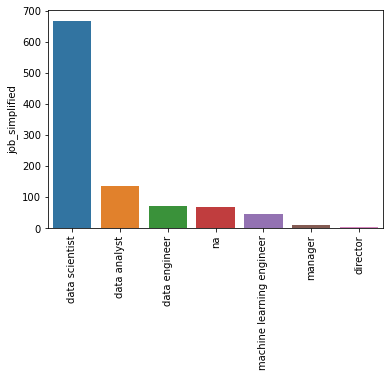

graph for seniority: total = 3


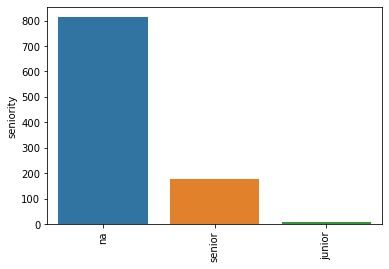

graph for Type of ownership: total = 12


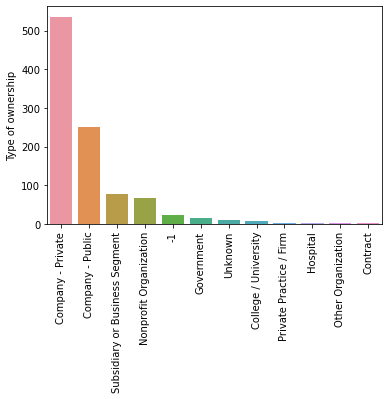

graph for Sector: total = 23


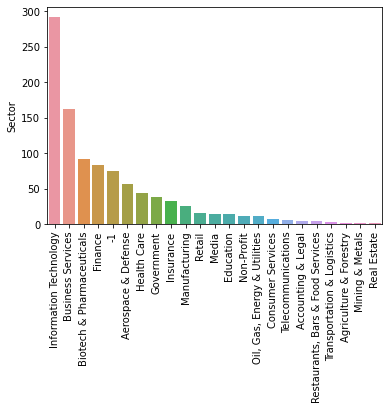

graph for Revenue: total = 14


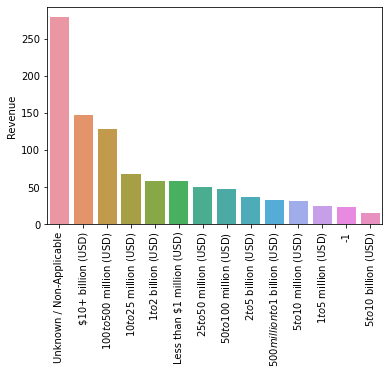

In [21]:
for column in df_cat.columns:
    cat_num = df_cat[column].value_counts()
    print("graph for {}: total = {}".format(column, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation= 90)
    plt.show()

- ## __Which states have a high demand for data scientists?__

    Companies based on California posts around 1/4 of data scientists jobs. Virginia posts almost 150 out of 1000 data scientists jobs. Because of the pandemic, remote jobs demand is also high. 

- ## __Company of which size/industry/type of ownership hire more data scientists?__

    Size: The trend is obvious. The larger the size of a company, the higher the demand for data scientists. Companies with 10,000+ employees post 200 out of 1000 data scientists jobs.

    Industry: Companies from information technology industry posts ~300 out of 1000 data scientists jobs. The second hottest industry for data scientists is business services industry. 

    Type of ownership: Not surprisingly, private companies post more than 500 out of 1000 data scientists jobs. 

- ## __How many jobs require/prefer applicants to have python/r/spark/aws/excel/sas/matlab/tableau/tensorflow skills?__

    Python: almost 700 out of 1000 jobs require python skills. Python proves to be a "must have" skill for data scientists.

    R: Surprisingly, R studio is not included in any job description. I assume companies do not use "R studio" to mention R skills. However, the letter "r" is used so frequently that my function cannot precisely distingush between R for R languages and "r" in any other words.

    Spark: 200 out of 1000 companies prefer applicants with Spark knowledges.

    Excel: Excel still appeared to be a "must have" skill for data scientists.

    Other skills are not mentioned very frequently in job descriptions.

### Pivot tables

I made several pivot tables to show the average salaries for different columns

In [23]:
# avg salary for different job titles and seniority
pd.pivot_table(df, index= ["job_simplified", "seniority"], values= "avg_salary").sort_values("avg_salary", ascending= False)

,,avg_salary
job_simplified,seniority,
manager,na,132.125000
data engineer,senior,125.500000
na,senior,124.166667
data scientist,junior,123.650000
data analyst,senior,118.987179
data scientist,senior,114.481308
na,na,111.801724
machine learning engineer,na,110.447368
data scientist,na,109.402727


In [29]:
# avg salary for different states and job titles
pd.pivot_table(df, index= ["job_state", "job_simplified"], values= "avg_salary", aggfunc="count").sort_values(by= "avg_salary", ascending= False)

,,avg_salary
job_state,job_simplified,
CA,data scientist,180
VA,data scientist,106
NY,data scientist,66
MA,data scientist,63
DC,data scientist,38
...,...,...
NY,na,1
OH,na,1
PA,data engineer,1


Data scientists work in California earn more salary than data scientists who work in other states

### Wordcloud from 1000 job descriptions

I created a wordcloud from all job descriptions of 1000 jobs to see which words are frequently mentioned by companies

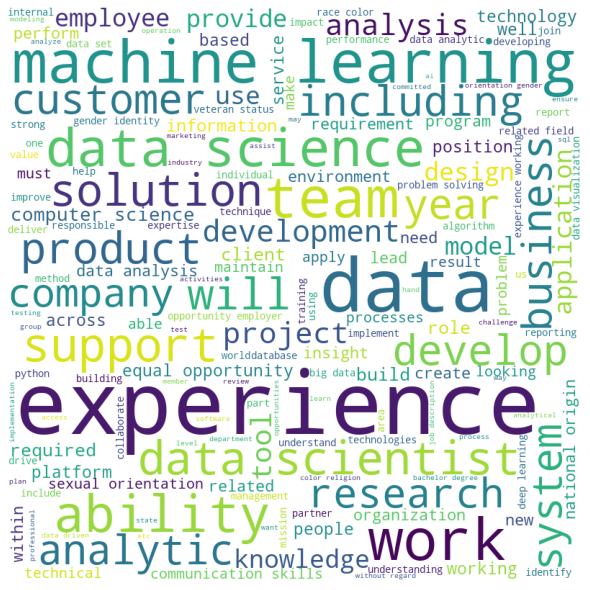

In [30]:
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in df["Job Description"]:
    # typecaste each val to string
    val = str(val)
    #split the value
    tokens = val.split()
    # converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width= 800, height= 800, background_color= "white", stopwords= stopwords,
                      min_font_size= 10).generate(comment_words)
#plot the image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Export to CSV

In [31]:
df.to_csv('data-scientist-salary-eda.csv', index= False)